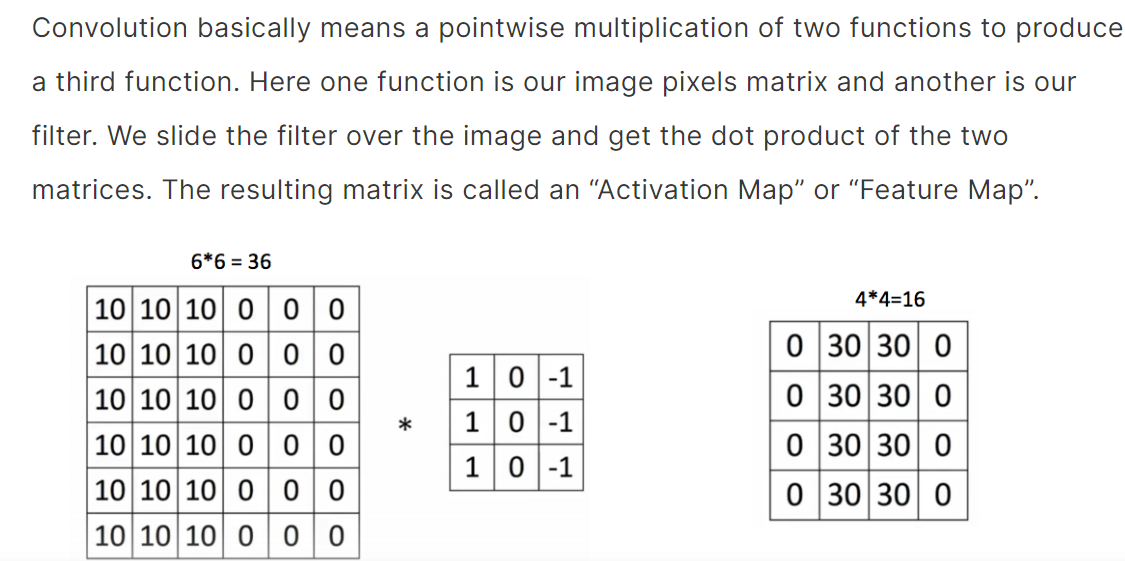

Image classification involves assigning labels or classes to input images. It is a supervised learning task where a model is trained on labeled image data to predict the class of unseen images. CNN are commonly used for image classification as they can learn hierarchical features like edges, textures, and shapes, enabling accurate object recognition in images. CNNs excel in this task because they can automatically extract meaningful spatial features from images. Here are different layers involved in the process:



1.   Input Layer
The input layer of a CNN takes in the raw image data as input. The images are typically represented as matrices of pixel values. The dimensions of the input layer correspond to the size of the input images (e.g., height, width, and color channels).

2.   Convolutional Layers
Convolutional layers are responsible for feature extraction. They consist of filters (also known as kernels) that are convolved with the input images to capture relevant patterns and features. These layers learn to detect edges, textures, shapes, and other important visual elements.

3.   Pooling Layers
Pooling layers reduce the spatial dimensions of the feature maps produced by the convolutional layers. They perform downsampling operations (e.g., max pooling) to retain the most salient information while discarding unnecessary details. This helps in achieving translation invariance and reducing computational complexity.

4.   Fully Connected Layers
The output of the last pooling layer is flattened and connected to one or more fully connected layers. These layers function as traditional neural network layers and classify the extracted features. The fully connected layers learn complex relationships between features and output class probabilities or predictions.

5.   Output Layer
The output layer represents the final layer of the CNN. It consists of neurons equal to the number of distinct classes in the classification task. The output layer provides each class’s classification probabilities or predictions, indicating the likelihood of the input image belonging to a particular class.

6.  Activation Functions: Functions like ReLU and Sigmoid introduce non-linearity into the network, enabling it to learn complex patterns.

7.   Loss Functions: These functions measure the error between predicted and actual labels, guiding the optimization process.

8. Optimization Algorithm: Algorithms like Stochastic Gradient Descent (SGD), Adam, or RMSprop are used to optimize the network’s parameters by minimizing the loss function.

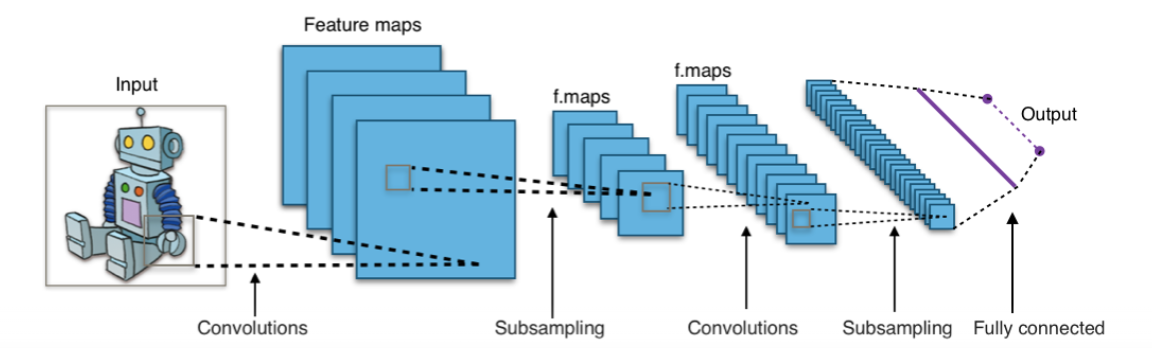

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F


In [2]:
# image transformations for converting images to PyTorch tensors and normalizing them.
#ToTensor Converts a PIL Image or a NumPy array (H x W x C) into a Tensor of shape (C x H x W).
# The pixel values are scaled from the range [0, 255] to the range [0.0, 1.0].
#transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)):
# Normalizes the image tensor.
# The first tuple (0.5, 0.5, 0.5) represents the mean for each channel (R, G, B),
# and the second tuple (0.5, 0.5, 0.5) represents the standard deviation for each channel.
# The normalization is done using the formula:
# normalized_value=(value−mean)/std_dev

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train = True, download=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train = False, download=True,
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 48177467.22it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [8]:
"""
This code defines a neural network architecture using the nn.Module class from PyTorch.
The Net class inherits from nn.Module and defines the layers of the network in its
__init__ method.
It has two convolutional layers (conv1 and conv2) with ReLU activation functions,
followed by max pooling layers (pool).
The fully connected layers (fc1, fc2, and fc3) process the output of the convolutional layers.
The forward method defines the forward pass of the network, where input x is passed through
each layer sequentially.
The view method reshapes the output of the second convolutional layer to be compatible
 with the fully connected layers.
 Finally, an instance of the Net class is created as net, representing the neural
 network model.
 """
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5) # nn.Conv2d(in_channel, out_channel, Kernel)
    # max pooling operation will consider non-overlapping 2x2 regions of the input
    # and output the maximum value from each region
    # stride is the number of pixels by which window moves
    self.pool = nn.MaxPool2d(2,2)
    # 6 is the input channel, 32 is the output channel size and 5 is the kernel size
    self.conv2 = nn.Conv2d(6, 32, 5)
    self.fc1 = nn.Linear(32*5*5, 120) # 32*5*5 = channels, 120 = neurons
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10) # 10 indicates number of labels
# The forward method defines the forward pass of the network,
# where input x is passed through each layer sequentially.
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    """ The view method is used to reshape the tensor. -1 tells PyTorch to infer
     the size of that dimension automatically.32 * 5 * 5 is explicitly given, and
     If x originally has shape [batch_size, 32, 5, 5], the total number of elements in x is:
     total_elements = batch_size ×32×5×5
     PyTorch calculates the -1 dimension as:inferred_dimension = total_elements/(32×5×5) = batch_size
    So the new shape will be [batch_size, 32 * 5 * 5], where 32 * 5 * 5 = 800."""
    #  prepare the data for the fully connected (or dense) layers
    x = x.view(-1, 32*5*5) #reshaping x
    x = F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum = 0.9)

In [9]:
for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss+=loss.item()
    if i%2000 == 1999:
      print('[%d,%5d]loss:%.3f' %(epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

[1, 2000]loss:2.305
[1, 4000]loss:2.306
[1, 6000]loss:2.305
[1, 8000]loss:2.305
[1,10000]loss:2.307
[1,12000]loss:2.305
[2, 2000]loss:2.304
[2, 4000]loss:2.305
[2, 6000]loss:2.306
[2, 8000]loss:2.305
[2,10000]loss:2.306
[2,12000]loss:2.307


In [10]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    inputs, labels = data
    outputs = net(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %
